https://universe.roboflow.com/bike-helmets/bike-helmet-detection-2vdjo/dataset/1

In [ ]:
!pip install ultralytics --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt') #pretrained

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 184MB/s]


In [ ]:
model.info(verbose=True)

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [ ]:
print(model.model)

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('/content/BikesHelmets6_png_jpg.rf.f865f46409b3c6abcb1216ec46381225.jpg')

In [ ]:
result = model(image)


0: 640x640 9 persons, 1 bicycle, 2 motorcycles, 13.3ms
Speed: 5.7ms preprocess, 13.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
for r in result:
  r.save(filename='result.jpg')

(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

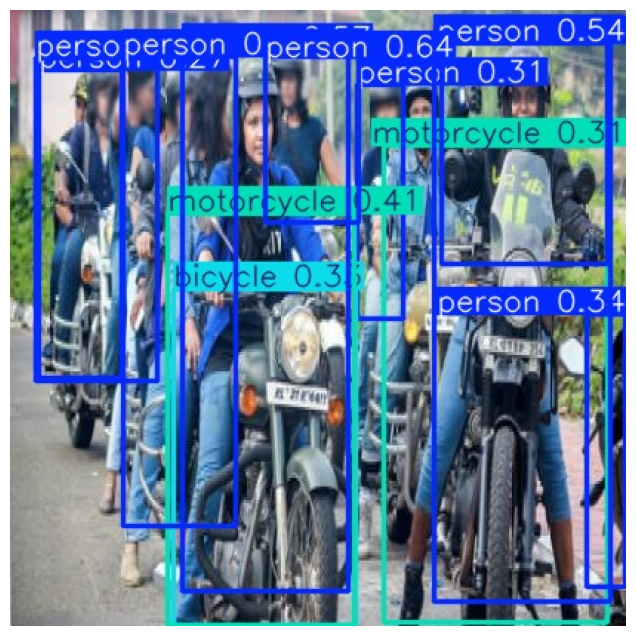

In [ ]:
img_result = cv2.imread('result.jpg')
img_rgb = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.axis('off')

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ROOT_DIR = '/content/gdrive/MyDrive/my_dataset2'

In [ ]:
model = YOLO('yolov9e.pt')

100%|██████████| 112M/112M [00:01<00:00, 98.4MB/s]


In [ ]:
import os

In [ ]:
model.train(data=os.path.join(ROOT_DIR, 'google_colab_config.yaml'), epochs=100, batch=256)

Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/my_dataset2/google_colab_config.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9e.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

100%|██████████| 755k/755k [00:00<00:00, 34.7MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1         0  torch.nn.modules.linear.Identity             []                            
  1                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  2                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  3                  -1  1    252160  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 2]        
  4                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  5                  -1  1   1004032  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 2]       
  6                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  7                  -1  1   4006912  ultralytics

 12                   5  1    229824  ultralytics.nn.modules.block.CBLinear        [512, [64, 128, 256]]         
 13                   7  1    984000  ultralytics.nn.modules.block.CBLinear        [1024, [64, 128, 256, 512]]   
 14                   9  1   2033600  ultralytics.nn.modules.block.CBLinear        [1024, [64, 128, 256, 512, 1024]]
 15                   0  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
 16[10, 11, 12, 13, 14, -1]  1         0  ultralytics.nn.modules.block.CBFuse          [[0, 0, 0, 0, 0]]             
 17                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
 18[11, 12, 13, 14, -1]  1         0  ultralytics.nn.modules.block.CBFuse          [[1, 1, 1, 1]]                
 19                  -1  1    252160  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 2]        
 20                  -1  1    164352  ultralytics.nn.modules.block.ADown         

100%|██████████| 5.35M/5.35M [00:00<00:00, 129MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.2 ms, read: 0.1±0.0 MB/s, size: 60.8 KB)


train: Scanning /content/gdrive/My Drive/my_dataset2/labels/train.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 3.0±3.0 ms, read: 12.0±18.2 MB/s, size: 57.5 KB)


val: Scanning /content/gdrive/My Drive/my_dataset2/labels/train.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      5.07G      1.721      3.904      1.709         17        640: 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]


                   all         15         84      0.357     0.0145    0.00538    0.00237

1 epochs completed in 0.003 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 117.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 117.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9e summary (fused): 279 layers, 57,378,713 parameters, 0 gradients, 189.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]


                   all         15         84      0.357     0.0145    0.00531    0.00235
             No_Helmet          3         12          0          0   0.000649   0.000325
                Helmet         15         69     0.0718     0.0435    0.00758    0.00328
            Background          2          3          1          0     0.0077    0.00344
Speed: 0.2ms preprocess, 39.1ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d49245068d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
model = YOLO('/content/hemletYoloV8_100epochs.pt')

In [ ]:
results = model('/content/BikesHelmets37_png_jpg.rf.381e8851f64be1a557c4e24910266b0c.jpg')


image 1/1 /content/BikesHelmets37_png_jpg.rf.381e8851f64be1a557c4e24910266b0c.jpg: 800x800 1 head, 5 helmets, 52.5ms
Speed: 30.8ms preprocess, 52.5ms inference, 6.4ms postprocess per image at shape (1, 3, 800, 800)


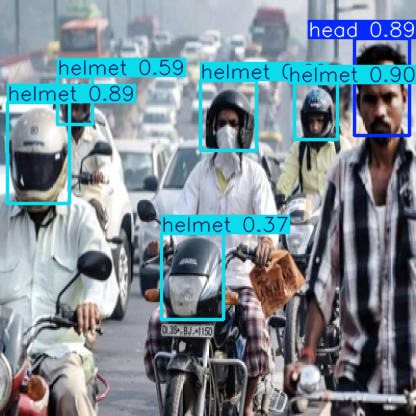

In [ ]:
results[0].show()

In [ ]:
from ultralytics import YOLO
import cv2

model = YOLO('yolov8n.pt')
cap = cv2.VideoCapture(0)

while True:
    success, img = cap.read()
    results = model(img, stream=True)

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0])
            cls = int(box.cls[0])
            label = model.names[cls]

            cv2.rectangle(img, (x1, y1), (x2,y2), (255,0,255), 2)
            cv2.putText(img, f"{label} {conf:2f}", (x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,255), 2)

            cv2.imshow("Webcam", img)
            cv2.waitKey(1)

